## 1. Exploratory Data Analysis

### Objective:

The objective is to gain a thorough understanding of our data; taking small steps forward is better than a large step backward.

### Basic Checklist:

#### Shape Analysis:

- **Target Variable**: `prix (DHs)`
- **Rows and Columns**: `(16467, 12)`
- **Types of Variables**: `Quantitative: 5`, `Qualitative: 7`
- **Identification of Missing Variables**: 
    - `ans`, `salles de bains`, and `etage` contain the most missing values.

#### Substantive Analysis:

- **Target Variable Insight**: The target variable `price` is positively skewed, indicating a non-normal distribution. It also contains numerous outliers.

- **Quantitative Variables**: Most quantitative variables are skewed (asymmetric), with exceptions like "salles de bains" and "chambres," which are also skewed but multimodal.

- **Qualitative Variables**: Variables like "autre" and "villes" exhibit a diverse range of classes compared to others.

- **Relation between Variables and Target**:

    - **Quantitative Variables**: There seems to be no significant correlation between numerical variables and the price. The presence of outliers might be influencing this lack of strong correlation.

    - **Qualitative Variables**: Apartments to renovate and those with an age between 50-70 may be priced higher. This observation might seem unusual, but it could be due to the majority of these apartments being located in areas with elevated apartment prices, or it could be influenced by the presence of outliers.

`After eliminating some outliers from the price and surface, the distribution of the data has changed, especially in terms of correlation. Outliers had a significant influence on the correlation. `

In [122]:
import pandas as pd



# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')

data1 = pd.read_csv('../data/appartements1.csv')
data2 = pd.read_csv('../data/appartements2.csv')
data=pd.concat([data1,data2],axis=0,ignore_index=True)
data.head(3)



,surface(m²),pieces,chambres,salles de bains,etat,etage,ans,ville,autre,prix(DHs),lienImage,lienArticle
0,80 m²,3 Pièces,2 Chambres,2 Salles de bains,Nouveau,NaN,NaN,Riad Al Atlas à Marrakech,Terrasse Piscine Cuisine équipée,1020000 DH,https://www.mubawab-media.com/ad/7/662/711F/h/...,https://www.mubawab.ma/fr/pa/7662711/vend-appa...
1,124 m²,4 Pièces,3 Chambres,2 Salles de bains,Nouveau,NaN,NaN,Centre à Tanger,Terrasse Garage Ascenseur Concierge Climatisat...,NaN,https://www.mubawab-media.com/ad/7/666/198F/h/...,https://www.mubawab.ma/fr/pa/7666198/superbe-a...
2,60 m²,3 Pièces,2 Chambres,NaN,Nouveau,NaN,NaN,Route Nationale Assilah (N1) à Tanger,Piscine Cuisine équipée,400000 DH,https://www.mubawab-media.com/ad/7/662/740F/h/...,https://www.mubawab.ma/fr/pa/7662740/apparteme...


In [123]:
df =data.copy()
df.shape

(16467, 12)

In [124]:
df.dropna(subset=['prix(DHs)'],inplace=True)

### convert numbers to numeric type


In [125]:


numeric_cols =['surface(m²)','pieces','chambres','salles de bains']

for col in numeric_cols:
        df[col]=df[col].replace({'Pièces':'','Chambres':'','Salles de bains':'','m²':''},regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

def convertPrix(value):
       
        value,type= str(value).split(' ')
        if type=='DH':
                return float(value)
        elif type=='EUR':
                return float(value)*11
               
df['prix(DHs)'] = df['prix(DHs)'].apply(convertPrix)

In [126]:
from sklearn.ensemble import IsolationForest

### extract cities

In [127]:
def extractStage(value):
    return int(value[0]) 
df.loc[df['etage'].notna(),'etage'] = df[df['etage'].notna()]['etage'].apply(extractStage)

In [128]:
df.head()

,surface(m²),pieces,chambres,salles de bains,etat,etage,ans,ville,autre,prix(DHs),lienImage,lienArticle
0,80.0,3.0,2.0,2.0,Nouveau,NaN,NaN,Riad Al Atlas à Marrakech,Terrasse Piscine Cuisine équipée,1020000.0,https://www.mubawab-media.com/ad/7/662/711F/h/...,https://www.mubawab.ma/fr/pa/7662711/vend-appa...
2,60.0,3.0,2.0,NaN,Nouveau,NaN,NaN,Route Nationale Assilah (N1) à Tanger,Piscine Cuisine équipée,400000.0,https://www.mubawab-media.com/ad/7/662/740F/h/...,https://www.mubawab.ma/fr/pa/7662740/apparteme...
4,76.0,3.0,2.0,2.0,Nouveau,NaN,NaN,Guéliz à Marrakech,Terrasse Garage Ascenseur Piscine Climatisatio...,988000.0,https://www.mubawab-media.com/ad/7/661/782F/h/...,https://www.mubawab.ma/fr/pa/7661782/apparteme...
5,72.0,4.0,3.0,NaN,Nouveau,NaN,NaN,Mhamid à Marrakech,NaN,250000.0,https://www.mubawab-media.com/ad/7/461/637F/h/...,https://www.mubawab.ma/fr/pa/7461637/apparteme...
6,70.0,4.0,3.0,2.0,Nouveau,NaN,NaN,Route Nationale Assilah (N1) à Tanger,Piscine Cuisine équipée,450000.0,https://www.mubawab-media.com/ad/7/662/741F/h/...,https://www.mubawab.ma/fr/pa/7662741/vend-appa...


In [129]:
df.drop_duplicates(inplace=True)
df.shape

(14428, 12)

In [130]:
df.dtypes.value_counts()

object     7
float64    5
dtype: int64

In [131]:
df.select_dtypes('object').columns

Index(['etat', 'etage', 'ans', 'ville', 'autre', 'lienImage', 'lienArticle'], dtype='object')

In [132]:
# df =df.drop(['lienImage','lienArticle'],axis=1)


In [133]:
df.describe()

,surface(m²),pieces,chambres,salles de bains,prix(DHs)
count,14387.000000,12397.000000,13214.000000,8489.000000,1.441800e+04
mean,120.468478,3.809470,2.581353,2.220521,1.725569e+06
std,447.490318,2.504787,1.162888,0.834092,1.119042e+07
min,20.000000,2.000000,2.000000,2.000000,6.200000e+03
25%,70.000000,3.000000,2.000000,2.000000,5.500000e+05
50%,93.000000,3.000000,2.000000,2.000000,9.500000e+05
75%,126.000000,4.000000,3.000000,2.000000,1.680000e+06
max,30000.000000,99.000000,78.000000,48.000000,9.800000e+08


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14428 entries, 0 to 16466
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   surface(m²)      14387 non-null  float64
 1   pieces           12397 non-null  float64
 2   chambres         13214 non-null  float64
 3   salles de bains  8489 non-null   float64
 4   etat             13783 non-null  object 
 5   etage            9827 non-null   object 
 6   ans              8374 non-null   object 
 7   ville            14428 non-null  object 
 8   autre            12761 non-null  object 
 9   prix(DHs)        14418 non-null  float64
 10  lienImage        14428 non-null  object 
 11  lienArticle      14428 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.4+ MB


### visualisation of the Nan

In [135]:
(df.isna().sum()/data.shape[0]).sort_values()

ville              0.000000
lienImage          0.000000
lienArticle        0.000000
prix(DHs)          0.000607
surface(m²)        0.002490
etat               0.039169
chambres           0.073723
autre              0.101233
pieces             0.123338
etage              0.279407
salles de bains    0.360661
ans                0.367644
dtype: float64

<Axes: >

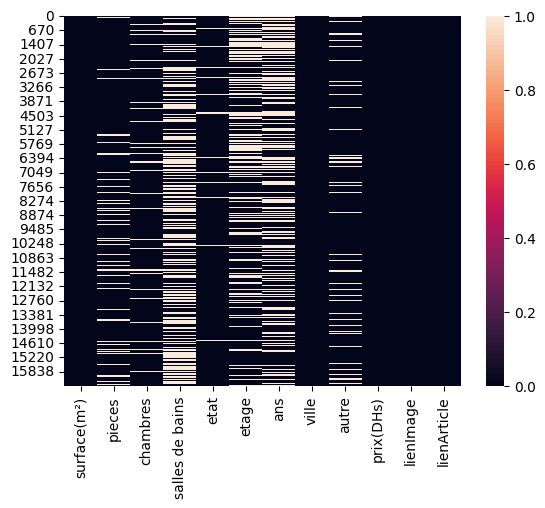

In [136]:
import seaborn as sns 

sns.heatmap(df.isna())

### visualisatoin of target

Text(0.5, 1.0, 'visualisation of "prix(DHs) by histplot')

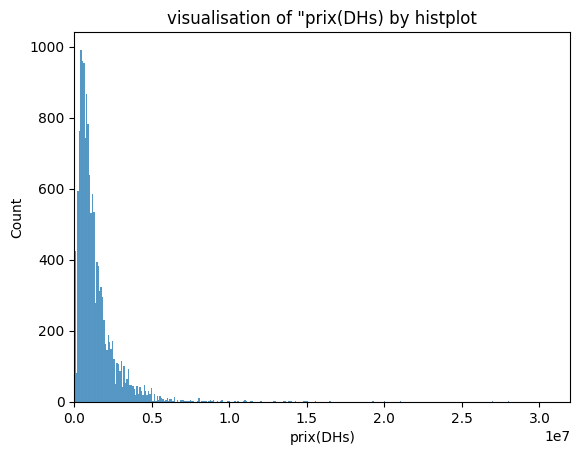

In [137]:
import matplotlib.pyplot as plt

sns.histplot(df['prix(DHs)'])
plt.xlim((0,32000000))
plt.title('visualisation of "prix(DHs) by histplot')

<Axes: >

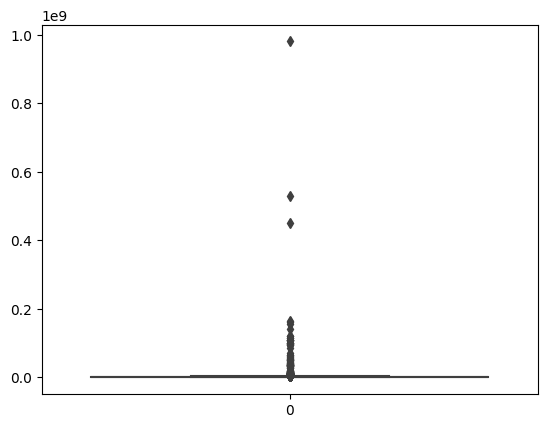

In [138]:
sns.boxplot(df['prix(DHs)'])

C:\Users\us\AppData\Local\Temp\ipykernel_14520\11763418.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['prix(DHs)'],bins=1000)


(-1.0, 50000000.0)

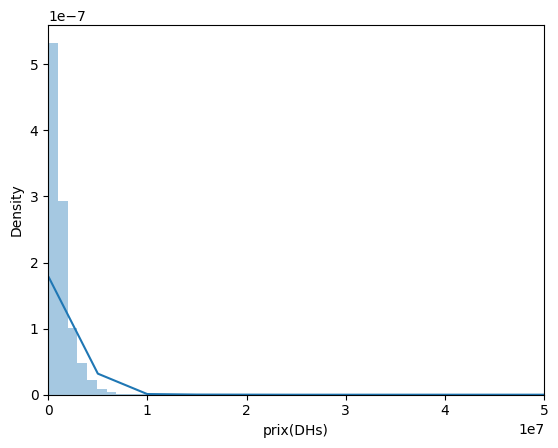

In [139]:
sns.distplot(df['prix(DHs)'],bins=1000)
plt.xlim((-1,50000000))

In [140]:
numeric_cols = df.select_dtypes('float').columns
categorical_cols =df.select_dtypes('object').columns

categorical_cols

Index(['etat', 'etage', 'ans', 'ville', 'autre', 'lienImage', 'lienArticle'], dtype='object')

In [141]:
(df['prix(DHs)'].value_counts()/df.shape[0]).sort_values()

982000.0      0.000069
1523000.0     0.000069
2184000.0     0.000069
85000000.0    0.000069
1745000.0     0.000069
                ...   
650000.0      0.014832
1100000.0     0.016496
1300000.0     0.017050
250000.0      0.018714
1200000.0     0.021417
Name: prix(DHs), Length: 1384, dtype: float64

### visualize numerical variables

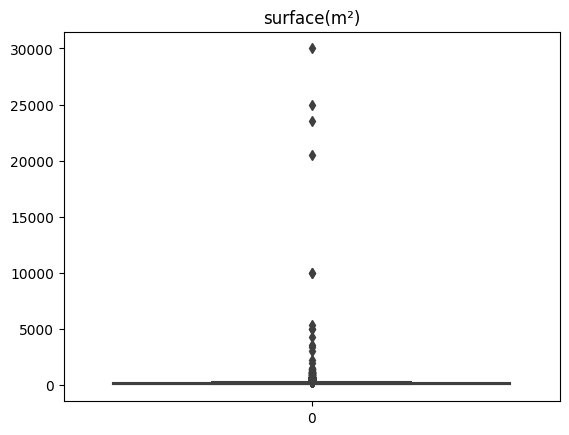

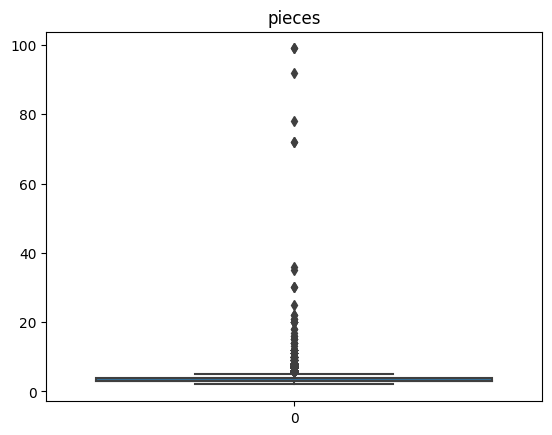

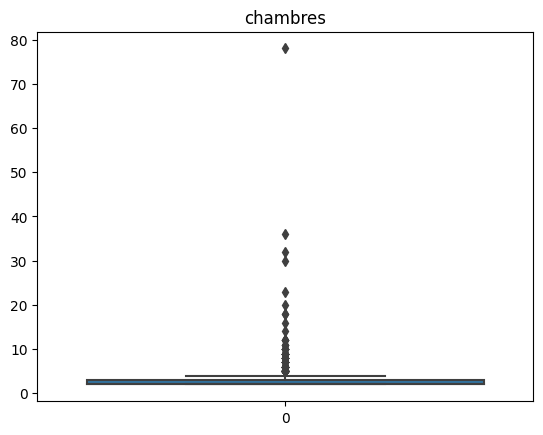

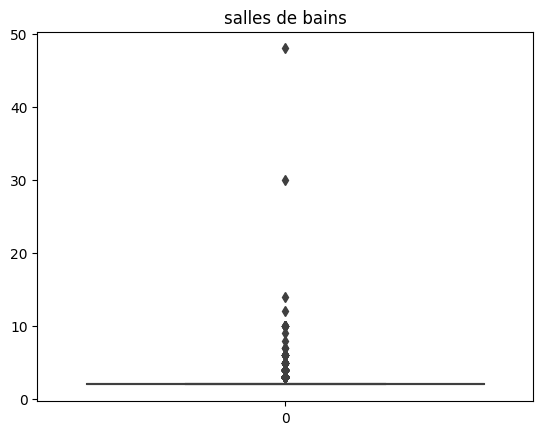

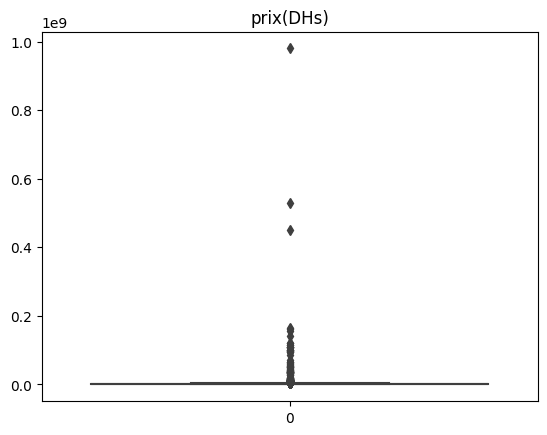

In [142]:
for col in numeric_cols:
    plt.figure()
    plt.title(col)
    sns.boxplot(df[col])

C:\Users\us\AppData\Local\Temp\ipykernel_14520\4262506916.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\us\AppData\Local\Temp\ipykernel_14520\4262506916.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\us\AppData\Local\Temp\ipykernel_14520\4262506916.

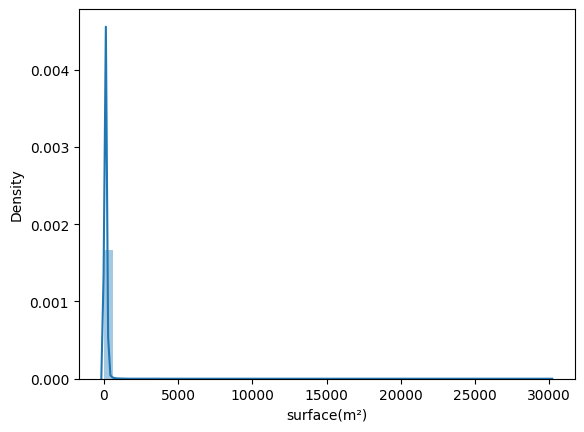

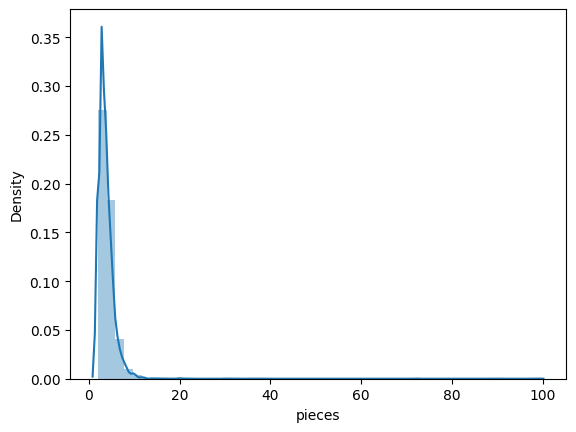

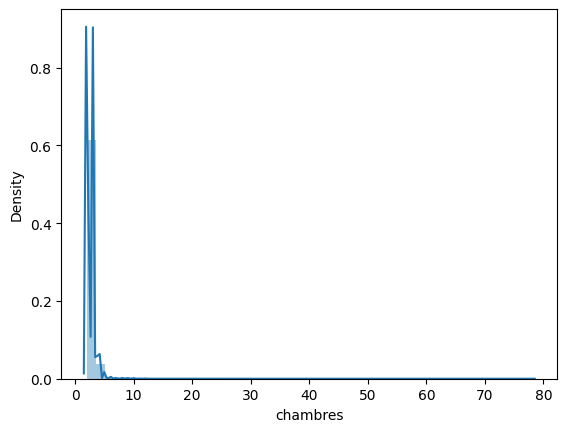

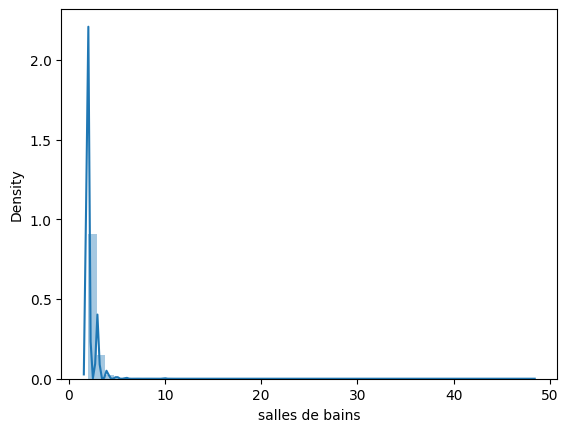

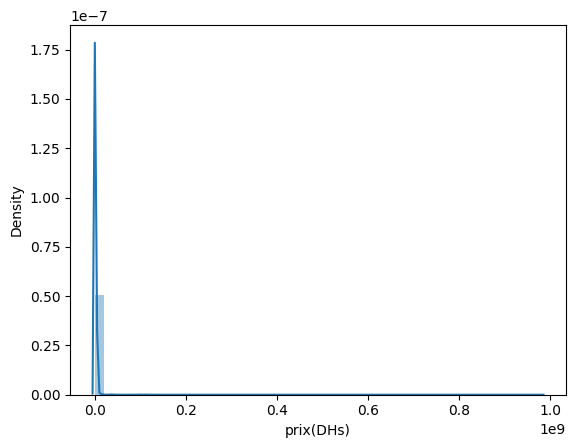

In [143]:
for col in numeric_cols:
    plt.figure()
    sns.distplot(df[col])
    plt.xlabel(col)

### visualisation of categorical variables

In [144]:
for col in categorical_cols:
    print(f"{col:-<50} >{df[col].unique()}")


etat---------------------------------------------- >['Nouveau' 'Bon état' 'À rénover' nan]
etage--------------------------------------------- >[nan 3 1 2 5 4 6 9 7 8]
ans----------------------------------------------- >[nan '5-10 ans' '10-20 ans' '30-50 ans' '1-5 ans' '20-30 ans'
 'Plus de 100 ans' '50-70 ans' '70-100 ans']
ville--------------------------------------------- >['Riad Al Atlas à Marrakech' 'Route Nationale Assilah (N1) à Tanger'
 'Guéliz à Marrakech' 'Mhamid à Marrakech' 'Palmier à Casablanca'
 'Mers Sultan à Casablanca' 'Les Hôpitaux à Casablanca'
 'Belvédère à Casablanca' 'Oulfa à Casablanca'
 'Tanger City Center à Tanger' 'Hay Alfadl à Marrakech'
 'Hay Targa à Marrakech' 'Agdal à Marrakech' 'Dar Bouazza'
 'Bourgogne Ouest à Casablanca' 'Racine à Casablanca'
 'Beauséjour à Casablanca' 'Californie à Casablanca'
 'Sidi Maarouf à Casablanca' 'Hay Mohammadi à Casablanca' 'Mehdia'
 'Daoudiat à Marrakech' 'Bouskoura' 'Burger à Casablanca'
 'Quartier Bachkou à Casablanca' 'Tan

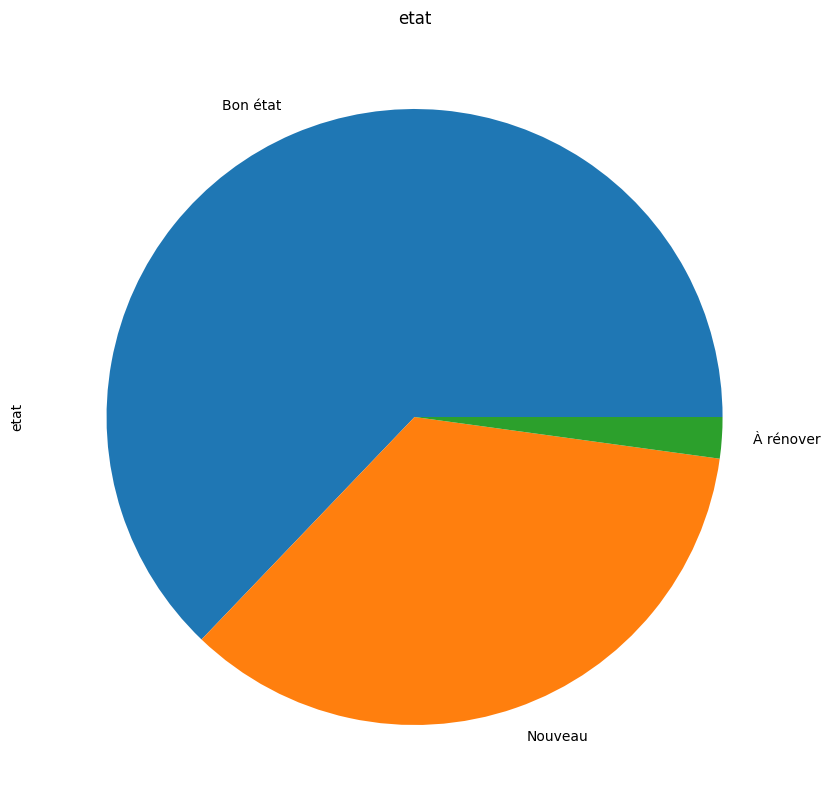

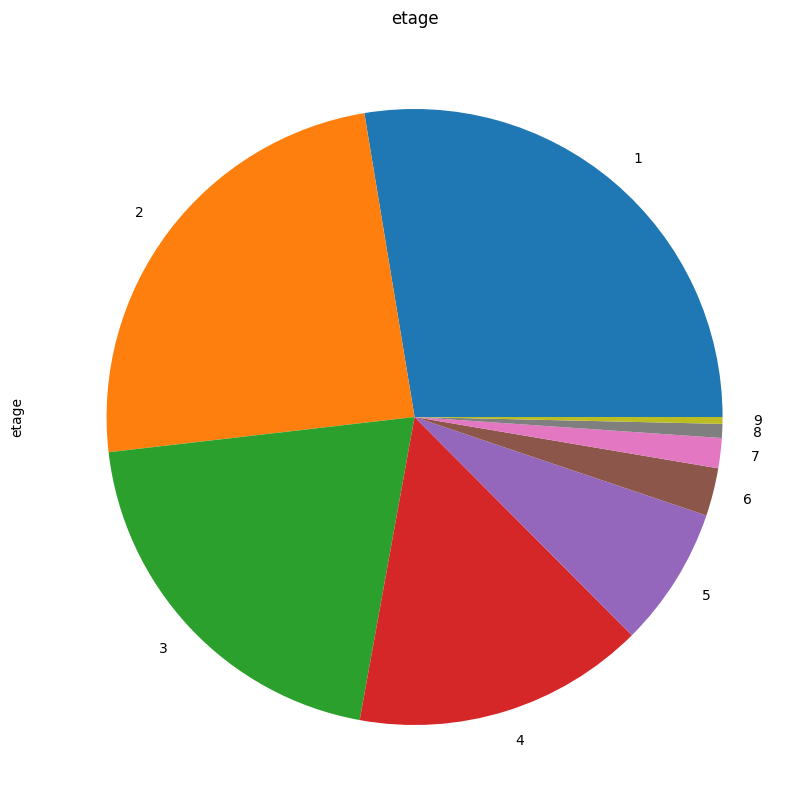

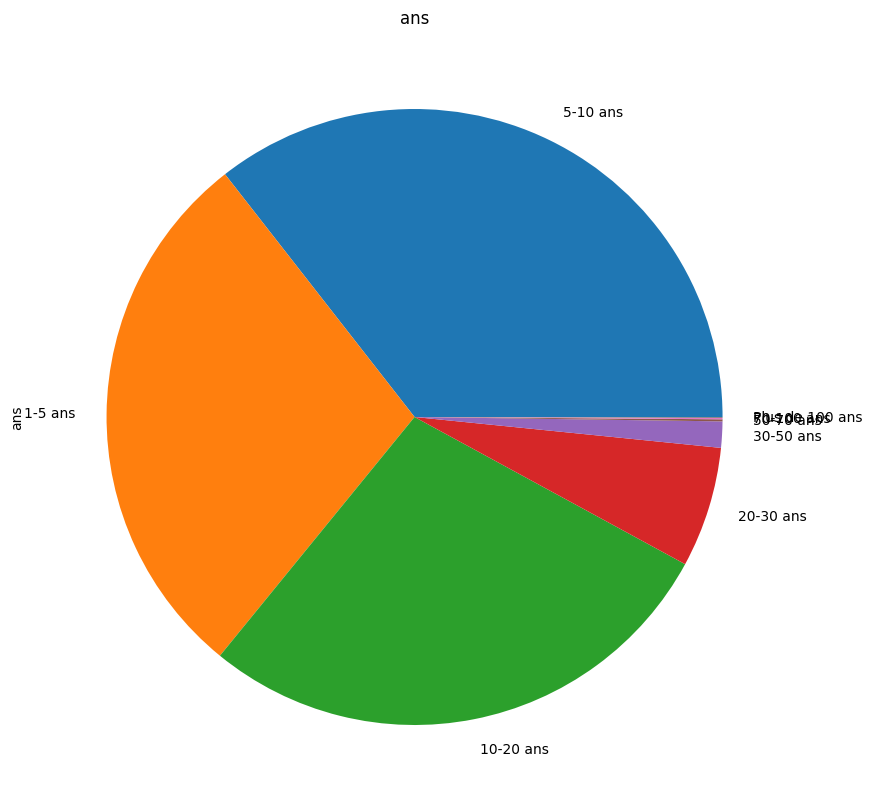

In [145]:
for col in categorical_cols[:3]:
    plt.figure(figsize=(10,10))
    df[col].value_counts(normalize=True).plot.pie()
    plt.title(col)


### visualisation of relation between numerical varaibles and the target

<Figure size 640x480 with 0 Axes>

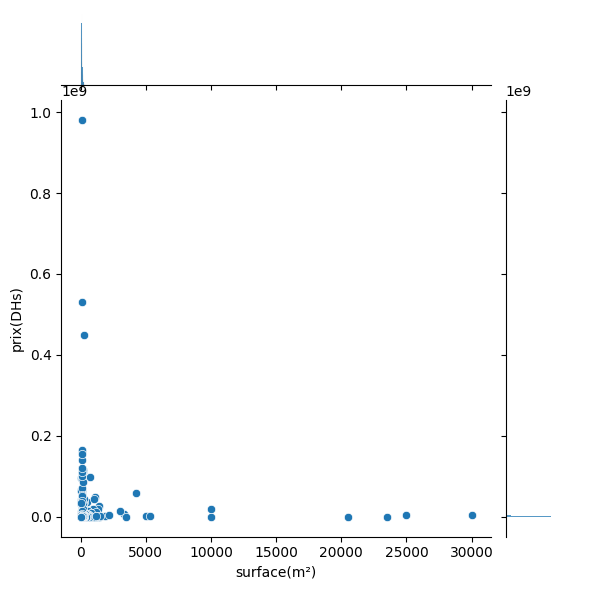

<Figure size 640x480 with 0 Axes>

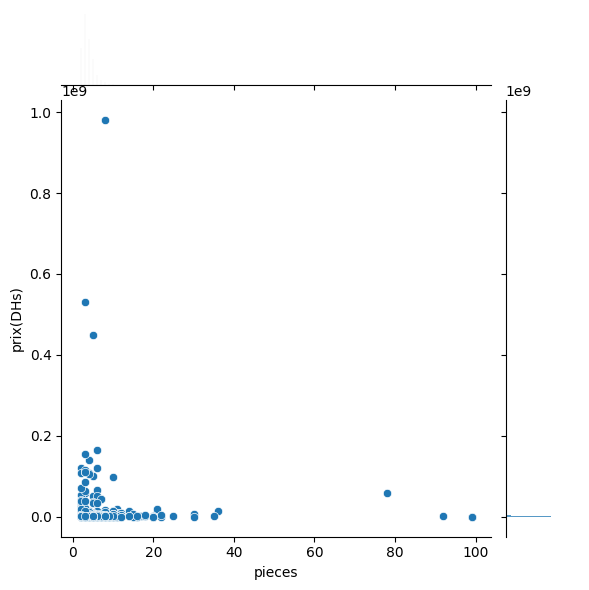

<Figure size 640x480 with 0 Axes>

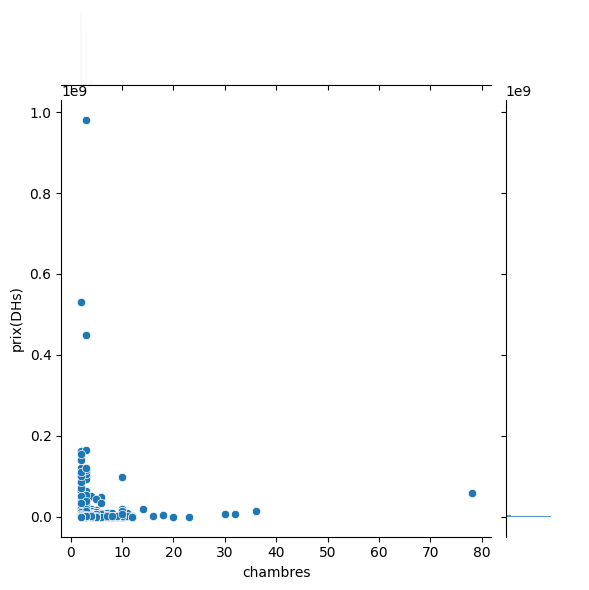

<Figure size 640x480 with 0 Axes>

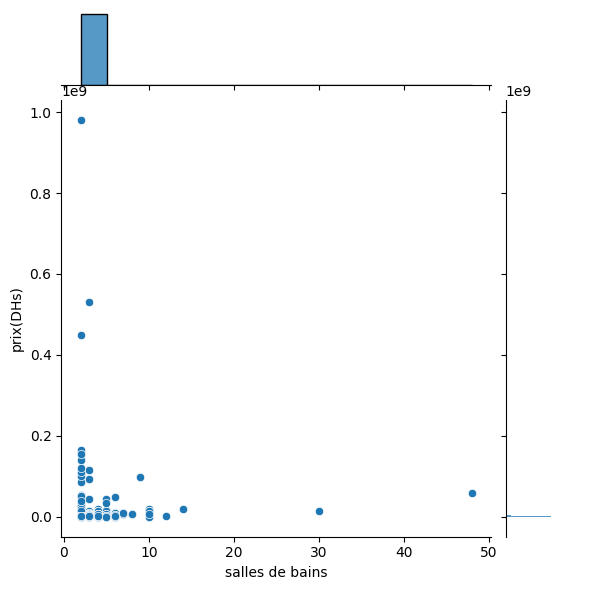

<Figure size 640x480 with 0 Axes>

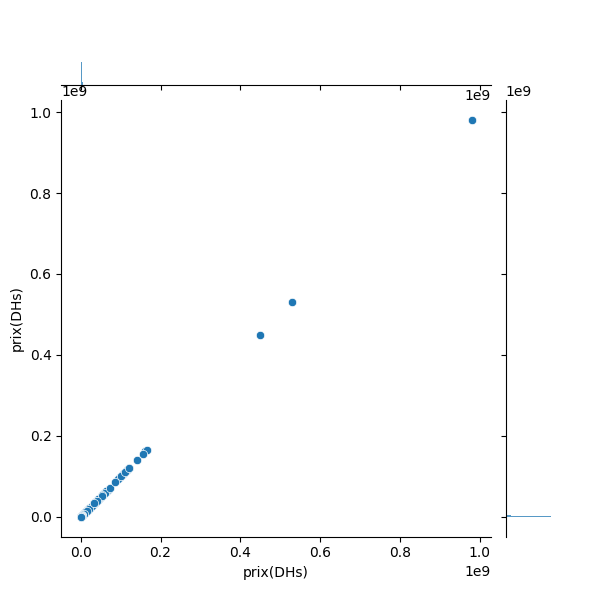

In [146]:
for col in numeric_cols:
    plt.figure()
    sns.jointplot(x=col,y='prix(DHs)',data=df)
    

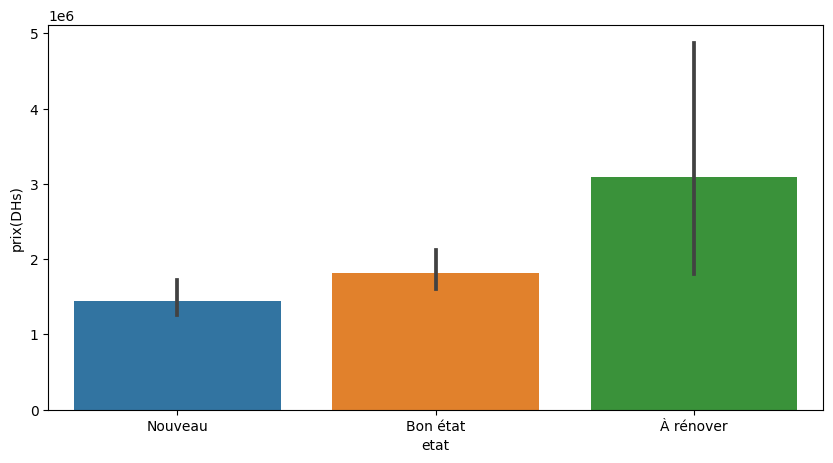

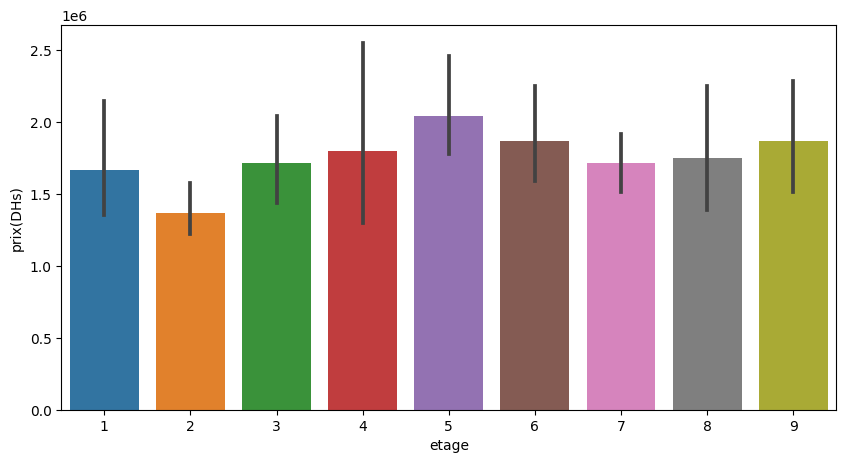

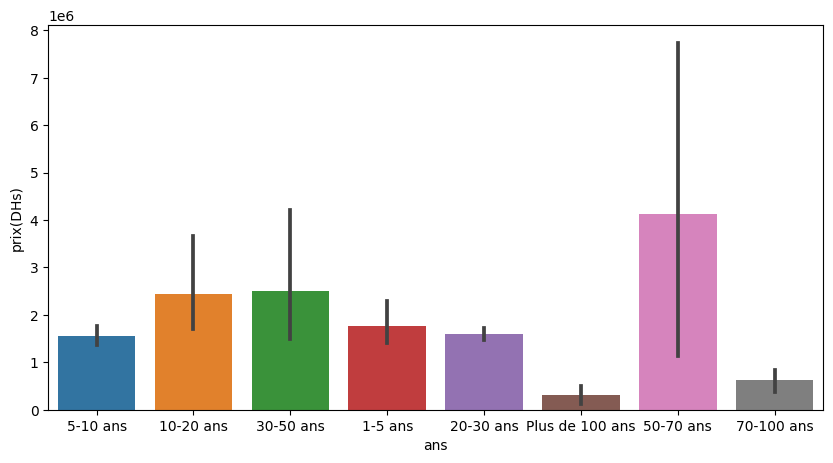

In [147]:
for col in categorical_cols[:3]:
    plt.figure(figsize=(10,5))
    sns.barplot(x=col, y='prix(DHs)', data=df)
    plt.show()

### relatoin between numerical variables

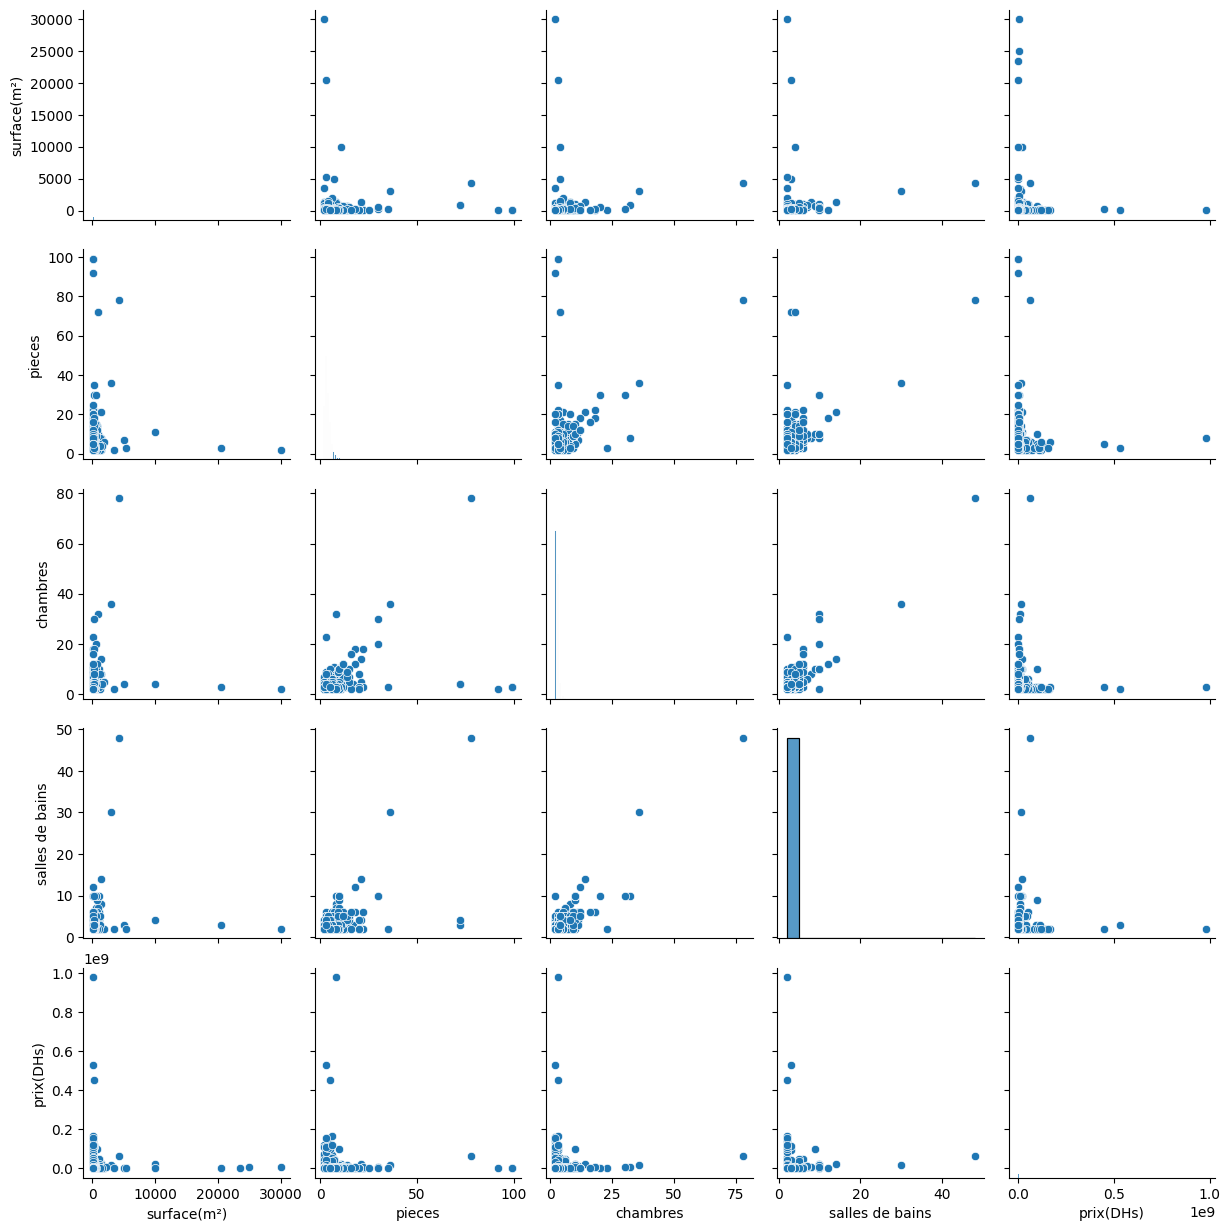

In [148]:
sns.pairplot(df[numeric_cols])

C:\Users\us\AppData\Local\Temp\ipykernel_14520\954606326.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

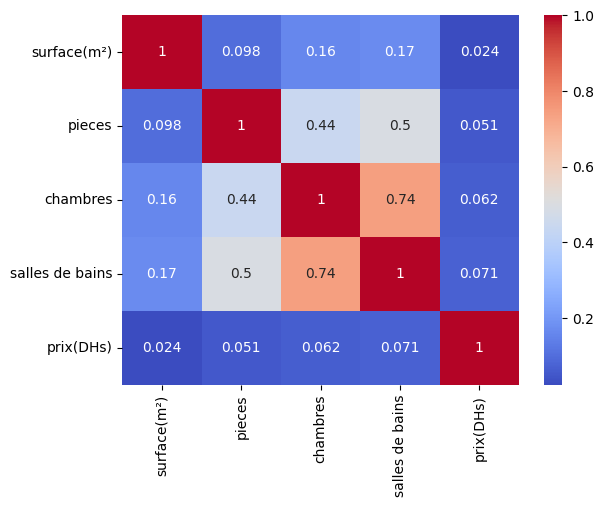

In [149]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Handling outliers using isolation forest

In [151]:
# df=df.dropna(axis=0)
# model = IsolationForest(contamination=0.5, random_state=42)

# # Fit the model on your data
# model.fit(df[numeric_cols])

# # Predict outliers (1 for inliers, -1 for outliers)
# outlier_predictions = model.predict(df[numeric_cols])

# # Filter out the outliers from the DataFrame
# df_no_outliers = df[outlier_predictions == 1]
# df= df_no_outliers


### Handling outliers manually

In [153]:
df=df[df['prix(DHs)']>160000]

df =df[df['prix(DHs)']<=3200000.0]
df =df[df ['surface(m²)']<200]
df =df[df ['pieces']<10]
df =df[df ['chambres']<5]


### visualisation of the data after handling outliers

#### the target

C:\Users\us\AppData\Local\Temp\ipykernel_14520\3728282221.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['prix(DHs)'],bins=1000)


<Axes: xlabel='prix(DHs)', ylabel='Density'>

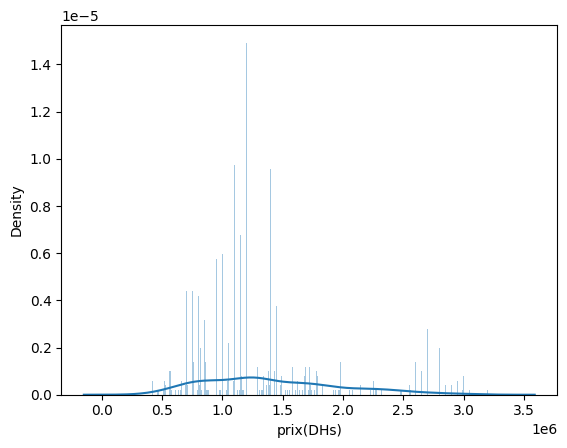

In [154]:
sns.distplot(df['prix(DHs)'],bins=1000)


#### numrical variables

C:\Users\us\AppData\Local\Temp\ipykernel_14520\4262506916.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\us\AppData\Local\Temp\ipykernel_14520\4262506916.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\us\AppData\Local\Temp\ipykernel_14520\4262506916.

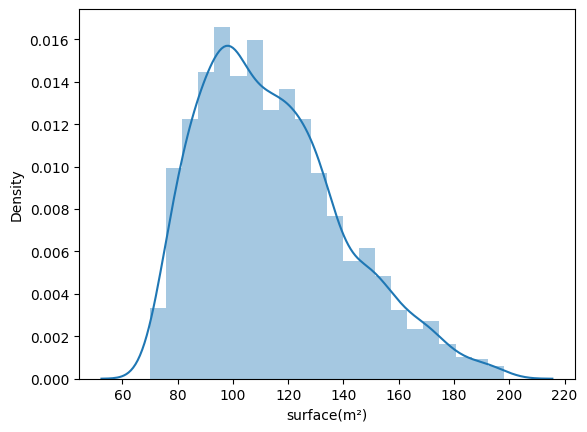

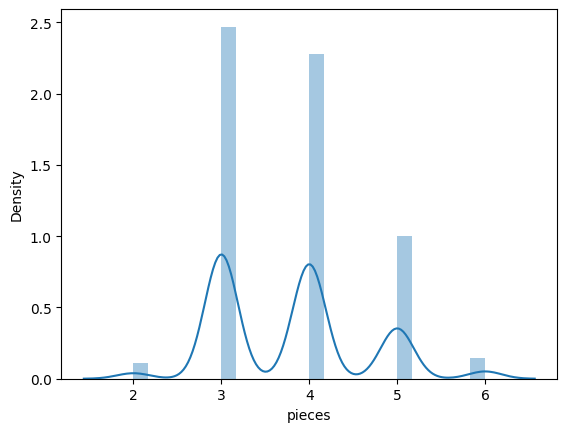

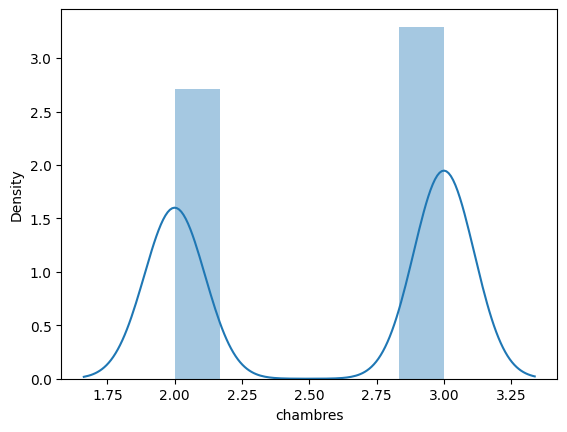

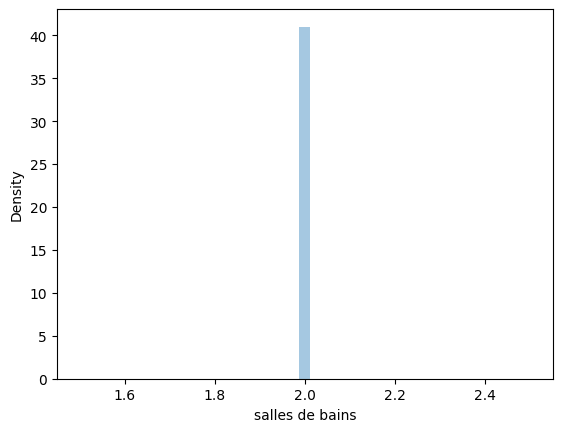

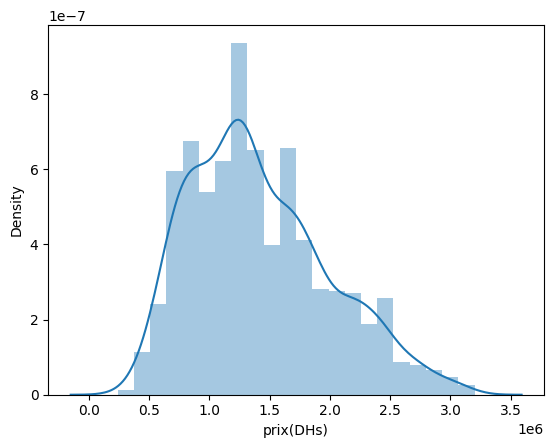

In [155]:
for col in numeric_cols:
    plt.figure()
    sns.distplot(df[col])
    plt.xlabel(col)

#### relationship between numerical and the target 

<Figure size 640x480 with 0 Axes>

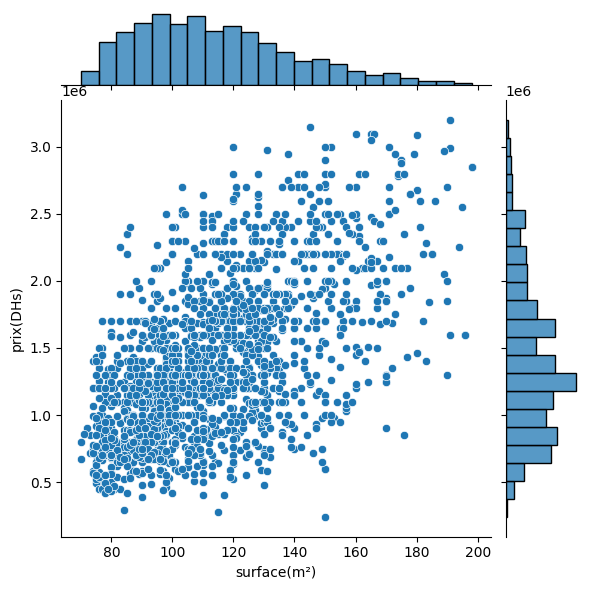

<Figure size 640x480 with 0 Axes>

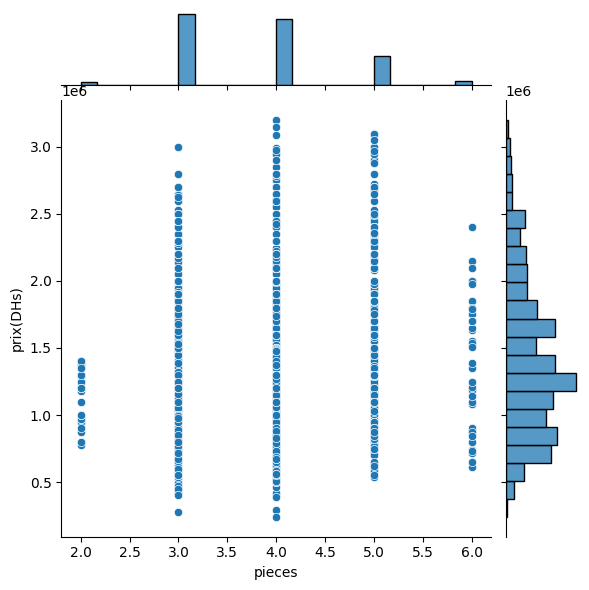

<Figure size 640x480 with 0 Axes>

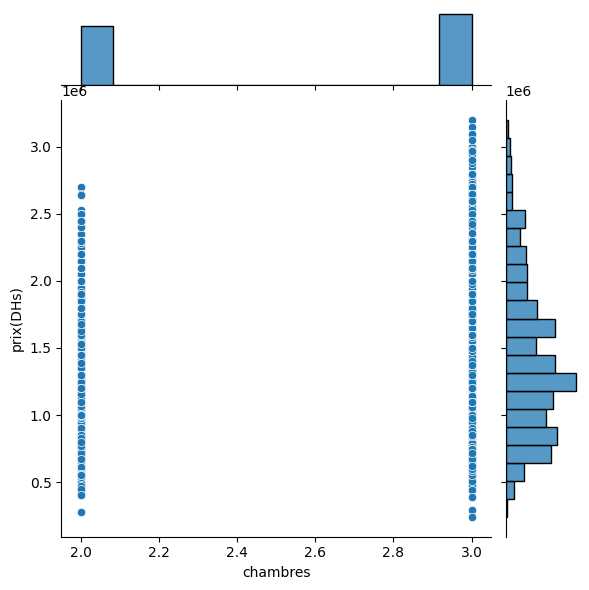

<Figure size 640x480 with 0 Axes>

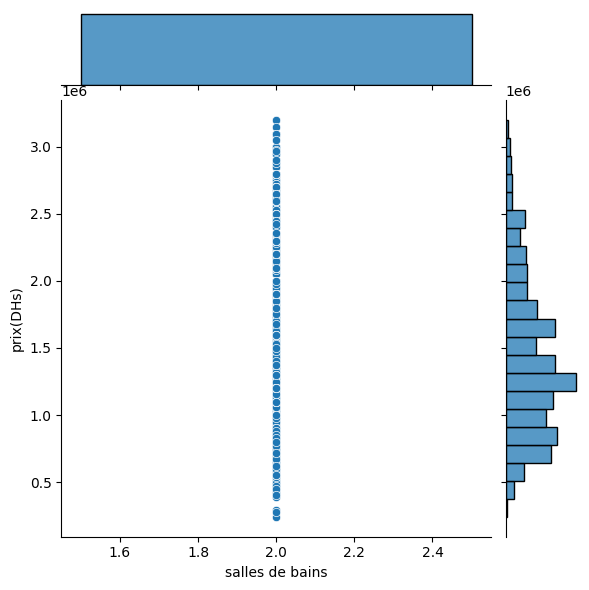

<Figure size 640x480 with 0 Axes>

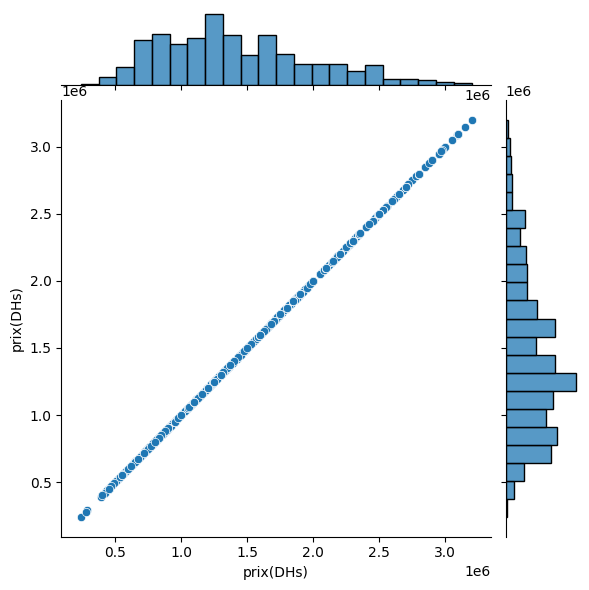

In [156]:
for col in numeric_cols:
    plt.figure()
    sns.jointplot(x=col,y='prix(DHs)',data=df)

#### relationship between categorical  varaibles and the target

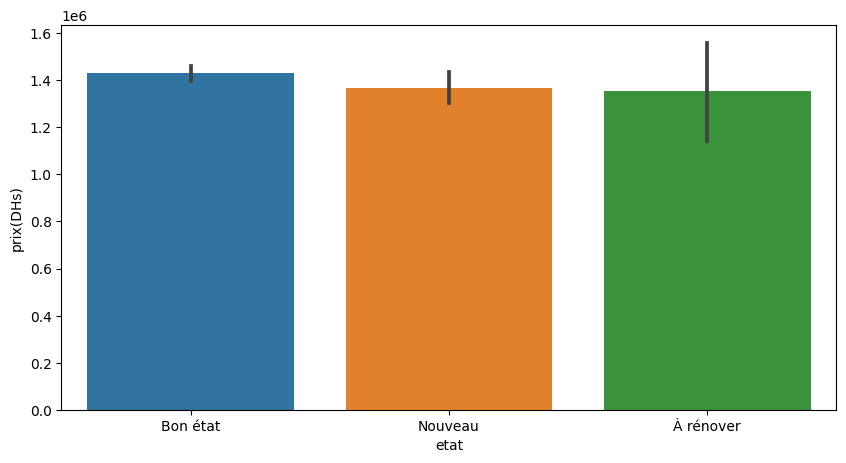

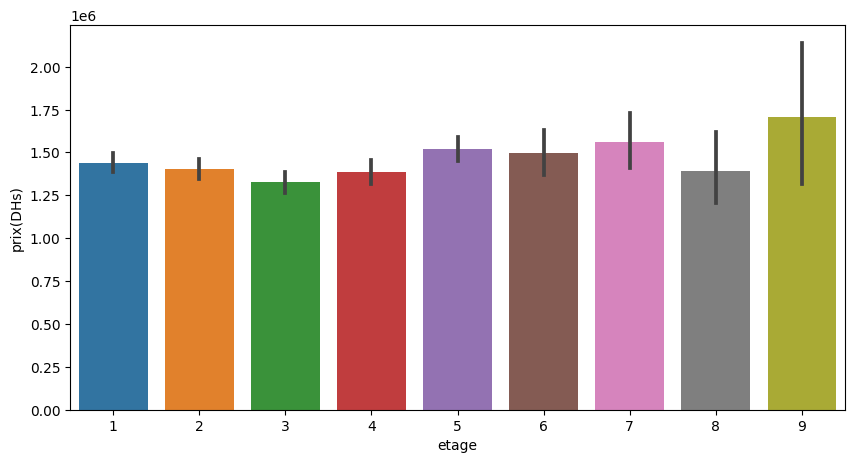

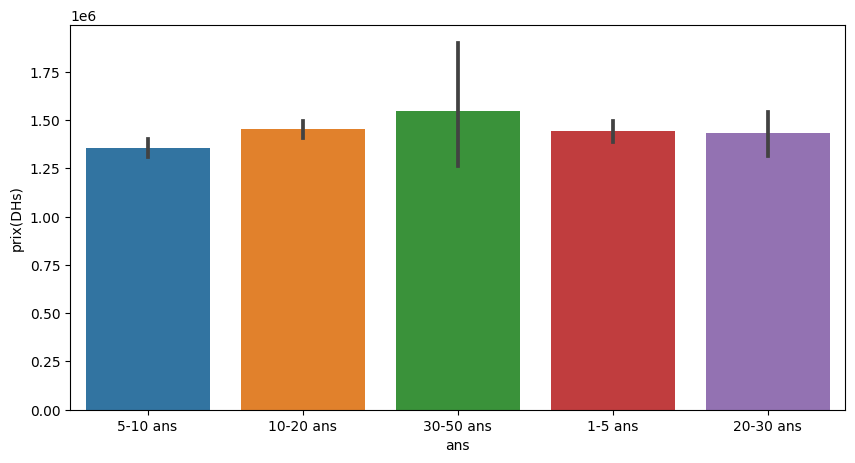

In [157]:
for col in categorical_cols[:3]:
    plt.figure(figsize=(10,5))
    sns.barplot(x=col, y='prix(DHs)', data=df)
    plt.show()

#### relationship between numerical varaibles

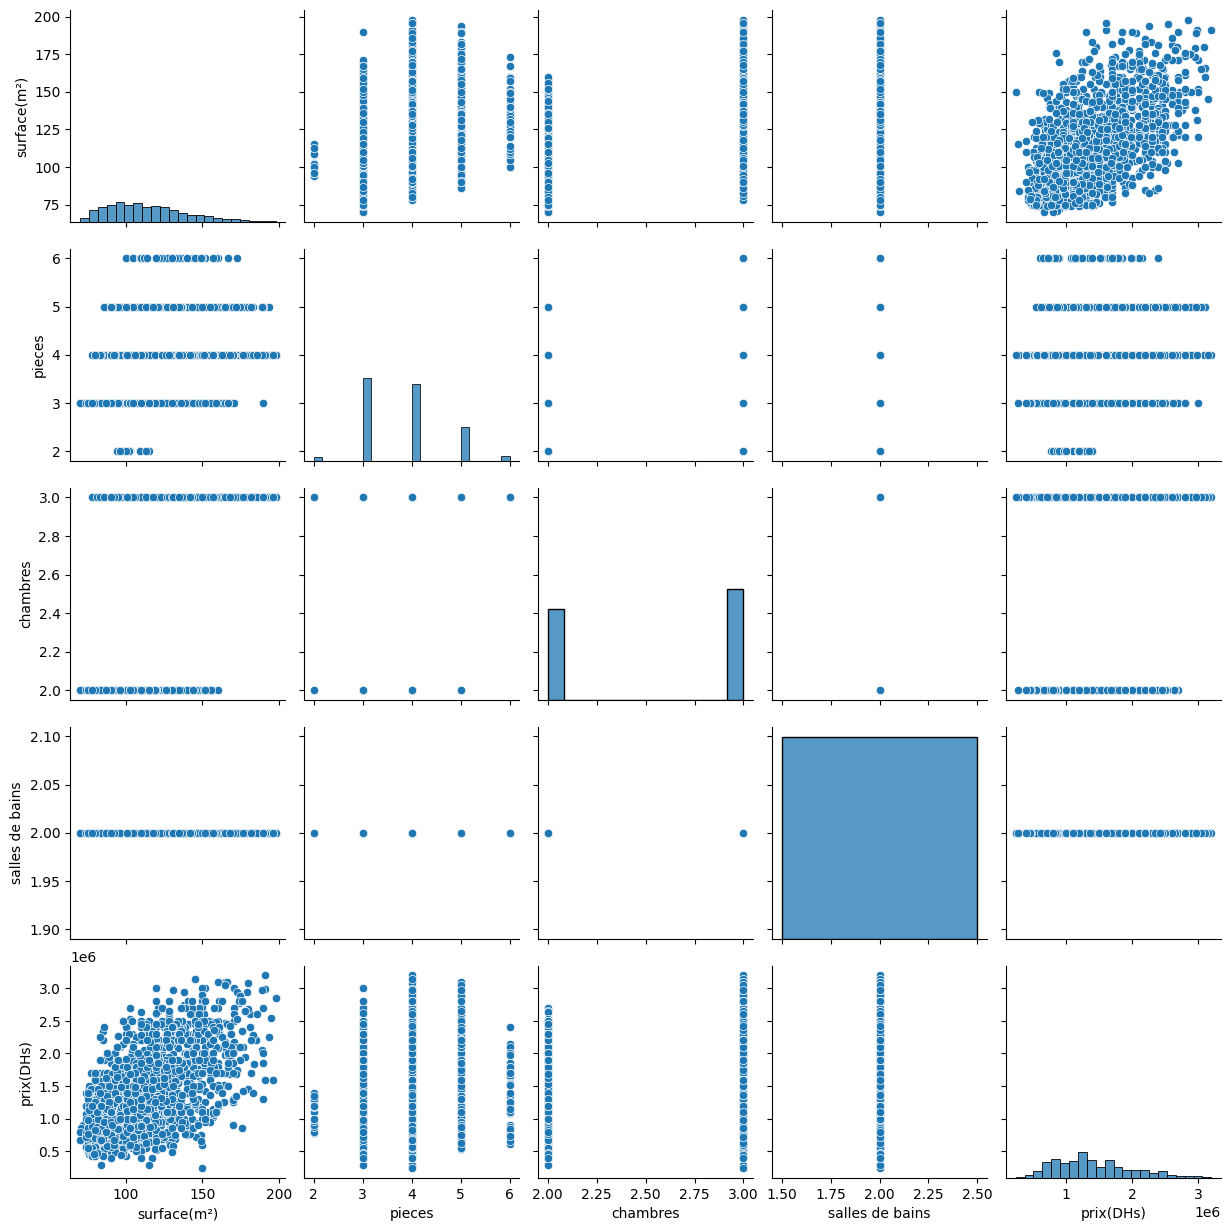

In [158]:
sns.pairplot(df[numeric_cols])

C:\Users\us\AppData\Local\Temp\ipykernel_14520\954606326.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

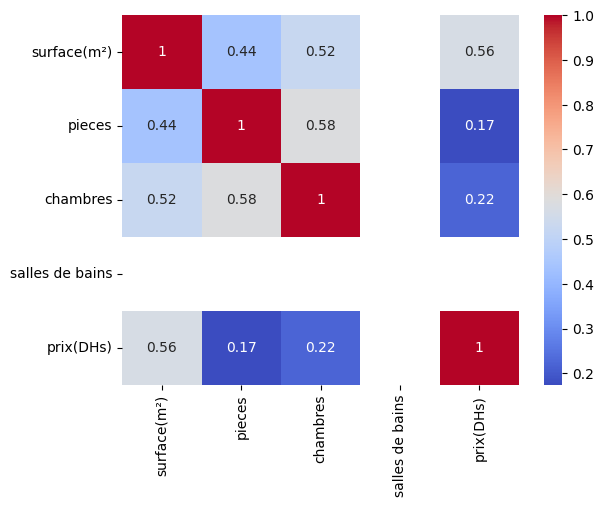

In [159]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')